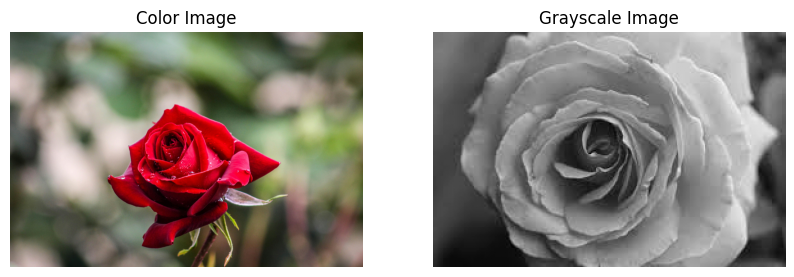

Shape of color image: (3456, 5184, 3)
Shape of grayscale image: (183, 275)


In [ ]:
# 1. Explain the basic components of a digital image and how it is represented in a computer. State the differences
# between grayscale and color images.

import cv2
import matplotlib.pyplot as plt

# Load an image (color and grayscale)
image_color = cv2.imread('/content/rose.jpg')  # This is a color image
image_grayscale = cv2.imread('/content/rose_grey.jfif', cv2.IMREAD_GRAYSCALE)  # Grayscale version

# Display the images
plt.figure(figsize=(10, 5))

# Color image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB))  # Convert from BGR to RGB for proper display
plt.title("Color Image")
plt.axis("off")

# Grayscale image
plt.subplot(1, 2, 2)
plt.imshow(image_grayscale, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")

plt.show()

# Print the shapes of the images
print(f"Shape of color image: {image_color.shape}")  # (height, width, 3)
print(f"Shape of grayscale image: {image_grayscale.shape}")  # (height, width)


**Basic Components of a Digital Image**

A digital image is a representation of a two-dimensional visual in a finite set of discrete values, known as pixels. Each pixel holds the intensity value of the light at that point in the image, which can range from 0 to 255 for an 8-bit image. The arrangement of these pixels forms the structure of the image.

**Image Representation in Computers**

In computers, images are represented as matrices. For a grayscale image, the matrix has two dimensions (height, width) where each entry corresponds to a pixel's brightness. In color images, each pixel is represented by three values, one for each color channel (Red, Green, Blue), forming a 3D matrix with dimensions (height, width, 3).

**Grayscale vs. Color Images**

Grayscale images use only one channel for intensity, with pixel values ranging from 0 (black) to 255 (white). These images contain less information compared to color images and thus have smaller file sizes. In contrast, color images use three channels (RGB), which allow them to represent a broader range of colors, making them larger in size and containing more detailed information.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9068 - loss: 0.3176 - val_accuracy: 0.9850 - val_loss: 0.0552
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9861 - loss: 0.0467 - val_accuracy: 0.9856 - val_loss: 0.0468
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9913 - loss: 0.0288 - val_accuracy: 0.9893 - val_loss: 0.0394
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9937 - loss: 0.0209 - val_accuracy: 0.9891 - val_loss: 0.0377
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9948 - loss: 0.0165 - val_accuracy: 0.9879 - val_loss: 0.0431
313/313 - 2s - 5ms/step - accuracy: 0.9898 - loss: 0.0339
Test accuracy: 98.98%


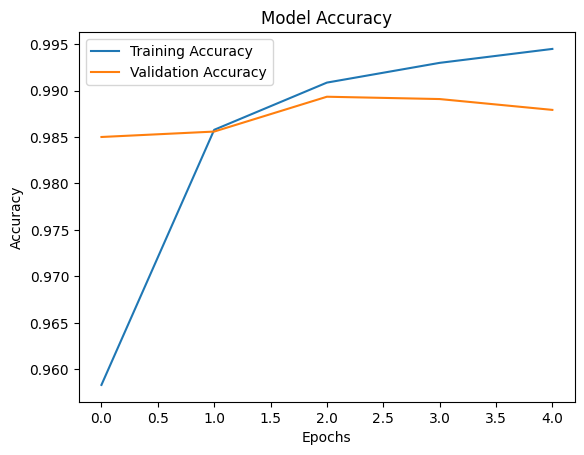

In [ ]:
# 2. Define Convolutional Neural Networks (CNNs) and discuss their role in image processing.Describe the key
# advantages of using CNNs over traditional neural networks for image-related task.

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the images to range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape for CNN input (add channel dimension)
x_train = x_train.reshape(-1, 28, 28, 1)  # (samples, height, width, channels)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # Convolutional layer
    MaxPooling2D((2, 2)),  # Max pooling layer
    Conv2D(64, (3, 3), activation='relu'),  # Another convolutional layer
    MaxPooling2D((2, 2)),  # Another pooling layer
    Flatten(),  # Flatten the feature map into a vector
    Dense(128, activation='relu'),  # Fully connected layer
    Dense(10, activation='softmax')  # Output layer for classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc * 100:.2f}%")

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


**Explanation: Convolutional Neural Networks (CNNs)**

Convolutional Neural Networks (CNNs) are a specialized type of neural network designed for processing structured data like images. They excel in tasks such as image recognition, classification, and segmentation due to their ability to automatically extract and learn features directly from input images.

CNNs consist of layers such as convolutional layers, pooling layers, and fully connected layers. The convolutional layers use filters (kernels) to detect patterns like edges, textures, or complex shapes, while pooling layers reduce the spatial dimensions to make the network computationally efficient.

**Key Advantages of CNNs Over Traditional Neural Networks**

Spatial Hierarchy: CNNs preserve spatial relationships in images by applying convolution operations. Traditional neural networks (fully connected networks) flatten the input image into a 1D vector, losing spatial context.

Parameter Sharing: CNNs use filters (shared weights) that slide over the input image, significantly reducing the number of parameters compared to fully connected layers.

Feature Extraction: CNNs automatically learn hierarchical features (edges, textures, patterns, and objects) from data, reducing the need for manual feature engineering.

Translation Invariance: Due to convolution and pooling, CNNs are robust to translation or small shifts in the input image, which is crucial for image-related tasks.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


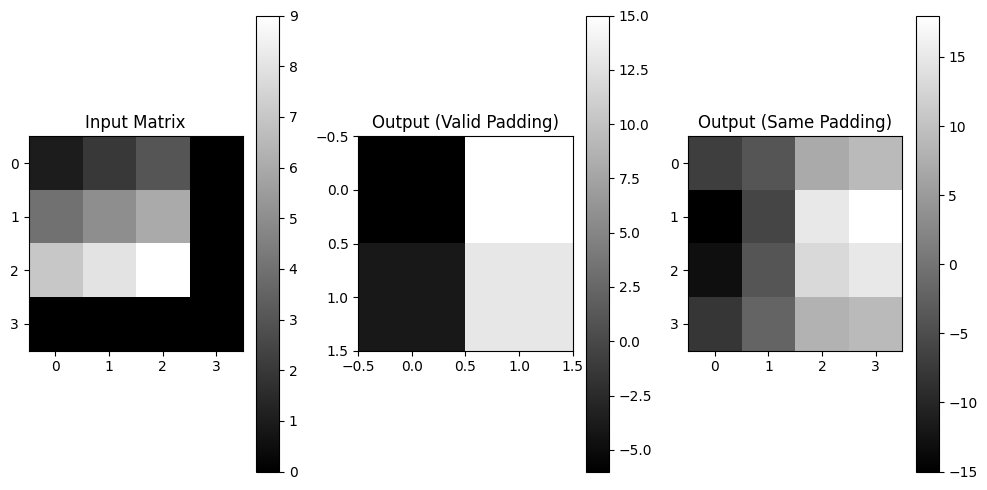

In [ ]:
# 3. Define convolutional layers and their purpose in a CNN. Discuss the concept of filters and how they are
# applied during the convolution operation.Explain the use of padding and strides in convolutional layers
# and their impact on the output size.

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D

# Create a simple input matrix (grayscale image)
input_matrix = np.array([[1, 2, 3, 0],
                         [4, 5, 6, 0],
                         [7, 8, 9, 0],
                         [0, 0, 0, 0]], dtype=np.float32).reshape(1, 4, 4, 1)  # Shape: (batch, height, width, channels)

# Define a filter (kernel)
filter_matrix = np.array([[1, 0, -1],
                          [1, 0, -1],
                          [1, 0, -1]], dtype=np.float32)  # A simple edge-detection filter

# Apply convolution without padding and stride=1
model_valid = Sequential([
    Conv2D(1, (3, 3), strides=(1, 1), padding='valid', input_shape=(4, 4, 1))
])
model_valid.layers[0].set_weights([filter_matrix.reshape(3, 3, 1, 1), np.array([0])])  # Set filter and bias
output_valid = model_valid.predict(input_matrix)

# Apply convolution with same padding and stride=1
model_same = Sequential([
    Conv2D(1, (3, 3), strides=(1, 1), padding='same', input_shape=(4, 4, 1))
])
model_same.layers[0].set_weights([filter_matrix.reshape(3, 3, 1, 1), np.array([0])])  # Set filter and bias
output_same = model_same.predict(input_matrix)

# Visualize results
plt.figure(figsize=(10, 5))

# Input Matrix
plt.subplot(1, 3, 1)
plt.title("Input Matrix")
plt.imshow(input_matrix[0, :, :, 0], cmap='gray')
plt.colorbar()

# Output with 'valid' padding
plt.subplot(1, 3, 2)
plt.title("Output (Valid Padding)")
plt.imshow(output_valid[0, :, :, 0], cmap='gray')
plt.colorbar()

# Output with 'same' padding
plt.subplot(1, 3, 3)
plt.title("Output (Same Padding)")
plt.imshow(output_same[0, :, :, 0], cmap='gray')
plt.colorbar()

plt.tight_layout()
plt.show()

**Explanation: Convolutional Layers and Their Purpose**

Convolutional layers are the fundamental building blocks of a CNN. Their primary purpose is to extract meaningful features (e.g., edges, textures, patterns) from the input data while preserving spatial relationships. They achieve this by applying filters (also called kernels) that slide over the input image, performing element-wise multiplication and summation at each location.

**Filters and Their Role**

A filter is a small matrix (e.g., 3x3 or 5x5) with learnable parameters. During the convolution operation, the filter is applied to patches of the input data to detect specific features, such as horizontal or vertical edges. The result of this operation is called a feature map, which highlights the detected features at corresponding locations.

Example: A 3x3 filter sliding over a 5x5 input produces a smaller feature map, depending on the strides and padding.

**Padding and Strides**

Padding: Padding involves adding extra layers of zeros around the input matrix to control the spatial dimensions of the output.

Valid Padding: No padding is applied, reducing the output size.
Same Padding: Padding is added so that the output has the same dimensions as the input.
Strides: Strides define the step size with which the filter moves across the input. A stride of 1 means the filter moves one pixel at a time, while a stride of 2 skips one pixel.

Larger strides reduce the output size but may miss finer details.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/pooling/base_pooling.py:23: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(name=name, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


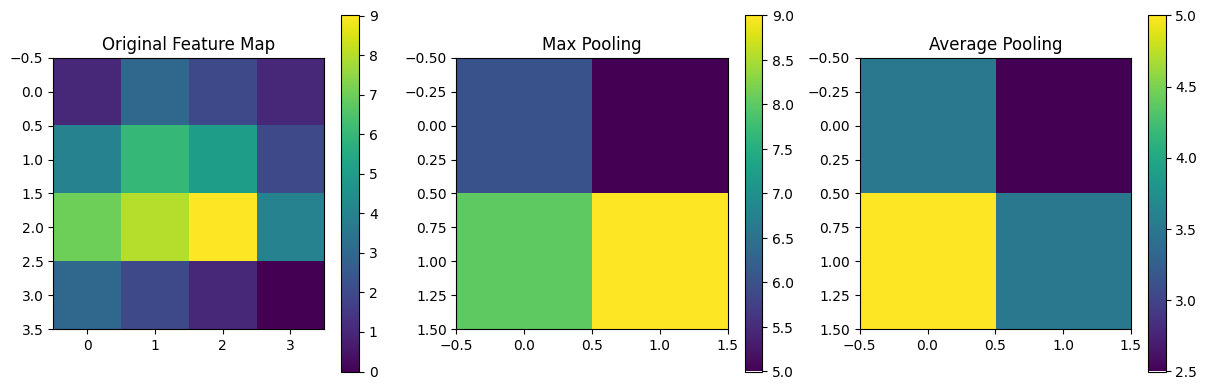

In [ ]:
# 4. Describe the purpose of pooling layers in CNNs. Compare max pooling and average pooling operations.

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D, AveragePooling2D

# Create a simple feature map (e.g., result from a convolutional layer)
feature_map = np.array([[1, 3, 2, 1],
                        [4, 6, 5, 2],
                        [7, 8, 9, 4],
                        [3, 2, 1, 0]], dtype=np.float32).reshape(1, 4, 4, 1)  # Shape: (batch, height, width, channels)

# Define max pooling and average pooling models
model_max_pool = Sequential([
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid', input_shape=(4, 4, 1))
])

model_avg_pool = Sequential([
    AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid', input_shape=(4, 4, 1))
])

# Apply pooling
output_max_pool = model_max_pool.predict(feature_map)
output_avg_pool = model_avg_pool.predict(feature_map)

# Visualize results
plt.figure(figsize=(12, 4))

# Original Feature Map
plt.subplot(1, 3, 1)
plt.title("Original Feature Map")
plt.imshow(feature_map[0, :, :, 0], cmap='viridis')
plt.colorbar()

# Max Pooling Output
plt.subplot(1, 3, 2)
plt.title("Max Pooling")
plt.imshow(output_max_pool[0, :, :, 0], cmap='viridis')
plt.colorbar()

# Average Pooling Output
plt.subplot(1, 3, 3)
plt.title("Average Pooling")
plt.imshow(output_avg_pool[0, :, :, 0], cmap='viridis')
plt.colorbar()

plt.tight_layout()
plt.show()



**Explanation: Purpose of Pooling Layers in CNNs**

Pooling layers in Convolutional Neural Networks (CNNs) are used to reduce the spatial dimensions of feature maps while retaining the most important features. This helps to:

1. Reduce computational complexity by decreasing the number of parameters.
2. Prevent overfitting by downsampling.
3. Extract dominant features by focusing on the most significant information in the region.
4.Provide translational invariance, ensuring the model is robust to small shifts or distortions in the input.

**Max Pooling vs. Average Pooling**

1.Max Pooling:

Operation: Selects the maximum value from each patch of the feature map.

Purpose: Captures the strongest (most significant) feature in a region.

Use Case: Commonly used in tasks where the presence of a feature is more important than its exact location (e.g., object detection).

2.Average Pooling:

Operation: Computes the average value from each patch of the feature map.

Purpose: Captures the overall information or smoothes out feature maps.

Use Case: Used in tasks where preserving average feature information is important (e.g., image denoising).